## SME0828 - Introdução à Ciência de Dados (2021)
### Projeto Final
Análise da base de dados 'Online Shoppers Intention'<br>
Lucas Tavares dos Santos - 10295180<br>
Renata Oliveira Brito - 10373663

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Fazendo a leitura da base de dados retirada do site https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset, temos:

In [2]:
#df = pd.read_csv('/work/online_shoppers_intention.csv')
df = pd.read_csv('C:/Users/lucas/Documents/USP/ICD/Online Shoppers Intention/online_shoppers_intention.csv')

In [3]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Formulação do problema e preparo dos dados

Vamos considerar a base de dados Online Shoppers Intention.

Nessa base, temos 10 atributos numéricos e 8 categóricos. Abaixo, temos os nomes de tais atributos:

In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

1. Administrative: Representa o número de páginas de categoria Administrativa.<br>
2. Administrative_Duration: Representa o tempo total gasto em páginas de categoria Administrativa.<br>
3. Informational: Representa o número de páginas de categoria Informacional. <br>
4. Informational_Duration: Representa o tempo total gasto em páginas de categoria Informacional. <br>
5. ProductRelated: Representa o número de páginas de categoria Produtos Relacionados. <br>
6. ProductRelated_Duration: Representa o tempo total gasto em páginas de categoria Produtos Relacionados.<br>
7. BounceRates: Porcentagem de visitantes que entram no site e saem sem ativar nenhuma outra requisição para o servidor naquela sessão.<br>
8. ExitRates: Taxa de saída da página web específica.<br>
9. PageValues: Valor médio para uma página web que um usuário visitou antes de concluir uma transação e-commerce.<br>
10. SpecialDay: Indica se a data de visita ao site é próxima a um dia comemorativo, no qual as sessões possuem maior chance de serem finalizadas com transações.<br>
11. Month: Mês em que a sessão foi realizada.<br>
12. OperatingSystems: Valores numéricas que representam o sistema operacional em que a sessão foi realizada.<br>
13. Browser: Navegador em que a sessão foi realizada.<br>
14. Region: Região de onde os usuários acessam o site.<br>
15. TrafficType: Diferentes tipos de tráfegos em páginas web.<br>
16. VisitorType: Diferentes tipos de visitantes da página web.<br>
17. Weekend: Atributo booleano que representa se a sessão foi realizada em um final de semana ou não.<br>
18. Revenue: Indica se houve receita ou não, ou seja, se a sessão resultou em venda. É a variável resposta da base.

Vemos que a base de dados possui a seguinte quantidade de linhas e colunas:

In [5]:
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}')

Número de linhas: 12330
Número de colunas: 18


Vamos descrever os dados:

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Temos que a variável 'Revenue' é a variável resposta dessa base. Vamos entendê-la melhor:

In [7]:
df['Revenue'].unique()

array([False,  True])

Com isso, vemos que 'Revenue' é uma variável binária. False indica que não houve vendas durante a sessão e True indica que houve.

## Limpeza e normalização dos dados

Vamos verificar também se há dados missing:

In [8]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Acima, vemos que não há nenhum dado missing nessa base de dados. Logo, não é necessário realizar nenhuma forma de tratamento de dados missing.

In [9]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

Não é possível realizar a normalização com dados categóricos, com isso substituímos os valores da variável "Month" conforme segue abaixo 

In [10]:
def changeMonth(df):
    df['Month'] = df['Month'].replace('Jan', 1)
    df['Month'] = df['Month'].replace('Feb', 2)
    df['Month'] = df['Month'].replace('Mar', 3)
    df['Month'] = df['Month'].replace('Apr', 4)
    df['Month'] = df['Month'].replace('May', 5)
    df['Month'] = df['Month'].replace('June', 6)
    df['Month'] = df['Month'].replace('Jul', 7)
    df['Month'] = df['Month'].replace('Aug', 8)
    df['Month'] = df['Month'].replace('Sep', 9)
    df['Month'] = df['Month'].replace('Oct', 10)
    df['Month'] = df['Month'].replace('Nov', 11)
    df['Month'] = df['Month'].replace('Dec', 12)
    return df

df_old = df.copy()
df = changeMonth(df)
df['Month'].unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12], dtype=int64)

De maneira semelhante ao tratamento anterior substituímos os valores da variável "VisitorType" conforme segue abaixo 

In [11]:
def changeVisitorType(df):
    df['VisitorType'] = df['VisitorType'].replace('Returning_Visitor', 1)
    df['VisitorType'] = df['VisitorType'].replace('New_Visitor', 2)
    df['VisitorType'] = df['VisitorType'].replace('Other', 3)
    return df

df = changeVisitorType(df)
df['VisitorType'].unique()

array([1, 2, 3], dtype=int64)

Para facilitar o processamento, vamos converter os dados para o formato numpy:

In [12]:
#df["Revenue"] = df["Revenue"].astype(int)
df["Revenue"] = df["Revenue"].astype(float)
data = df.to_numpy()
nrow, ncol = data.shape
X = data[:,0:ncol-1]
y = df['Revenue'].to_numpy()

In [13]:
X, y

(array([[0, 0.0, 0, ..., 1, 1, False],
        [0, 0.0, 0, ..., 2, 1, False],
        [0, 0.0, 0, ..., 3, 1, False],
        ...,
        [0, 0.0, 0, ..., 13, 1, True],
        [4, 75.0, 0, ..., 11, 1, False],
        [0, 0.0, 0, ..., 2, 2, True]], dtype=object),
 array([0., 0., 0., ..., 0., 0., 0.]))

Os dados podem ser normalizados, pois assim é possível evitar o efeito da escala dos atributos nos métodos de aprendizado:

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Dados transformados:')
print(f'Media: {np.mean(X, axis=0)}')
print(f'Desvio Padrao: {np.std(X, axis=0)}')

Dados transformados:
Media: [-2.99661170e-17  6.28135914e-17 -4.61017185e-18 -2.53559452e-17
  4.61017185e-17 -8.29830932e-17 -6.45424058e-17  3.68813748e-17
  1.06033952e-16 -5.53220622e-17 -2.21288249e-16  4.61017185e-18
  1.49830585e-17  7.72203784e-17 -2.99661170e-17 -2.25898420e-16
  2.30508592e-18]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Ao normalizar, temos que a média é 0 e o desvio padrão é 1. Vemos acima que os valores estão tendendo ao esperado, então pode-se concluir que a base realmente foi normalizada.

## Análise descritiva


Vamos verificar quantas receitas foram feitas em cada mês:

<AxesSubplot:xlabel='Month'>

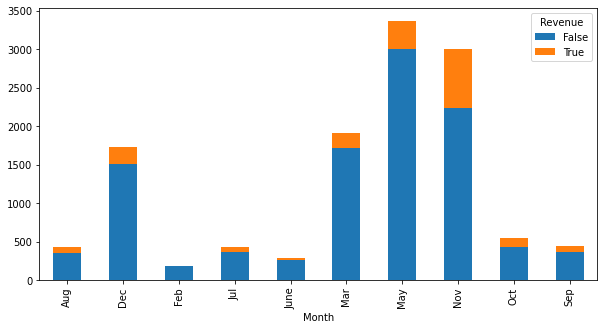

In [15]:
df_old.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))

Podemos ver que novembro teve um numero maior de receita.

Agora vamos verificar o tipo de visitante:

<AxesSubplot:ylabel='VisitorType'>

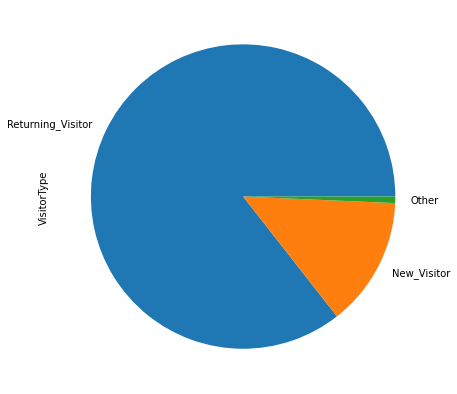

In [16]:
df_old['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7))

É possível notar que a maior parte dos visitantes, são visitantes antigos. É um ponto interessante para pensar em possíveis estratégias de vendas. Vamos verificar quais paginas tiveram maiores números de receitas:

<AxesSubplot:>

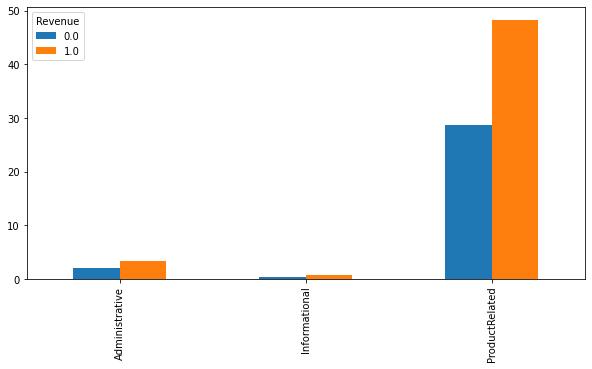

In [17]:
df_old=df[['Administrative','Informational','ProductRelated','Revenue']]
pd.pivot_table(df_old, values=['Administrative','Informational','ProductRelated'],columns=['Revenue'], aggfunc='mean').plot(kind='bar', figsize=(10, 5))

Foi possível observar que a página de Produtos Relacionados obteve o maior número de receita.

Abaixo, vamos utilizar o PCA para ver a importância de cada feature para o problema:

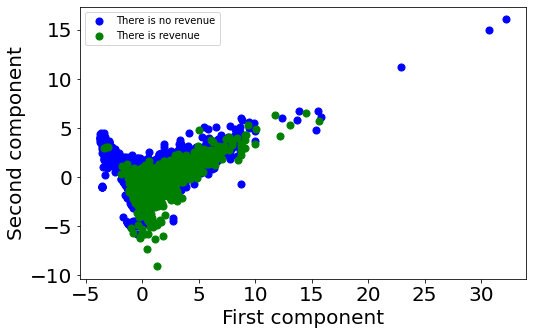

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'There is revenue'
    else:
        lb = 'There is no revenue'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Vemos que em duas dimensões, a separação não é clara, e que as duas componentes principais estão positivamente correlacionadas.

Além disso, podemos identificar os atributos que mais explicam a variância nos dados:

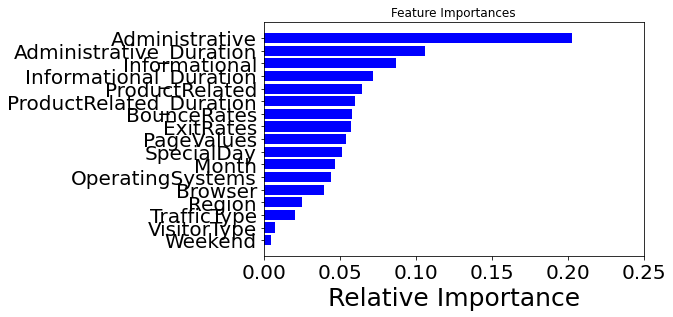

In [19]:
pca = PCA()
pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
attributes = df.columns[0:len(df.columns)-1]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()

In [20]:
importances.sum()

1.0

Ao somar as importâncias relativas de cada variável, temos que o resultado é 1, ou seja, todas as variáveis, juntas, explicam 100% da variação total. Com isso, podemos escolher uma quantidade menor, e que ainda obtenha um bom resultado. No entanto, como nossa base não possui muitas variáveis, utilizaremos a base completa para treinar os modelos.

Podemos verificar como a variância muda de acordo com o número de componentes: 

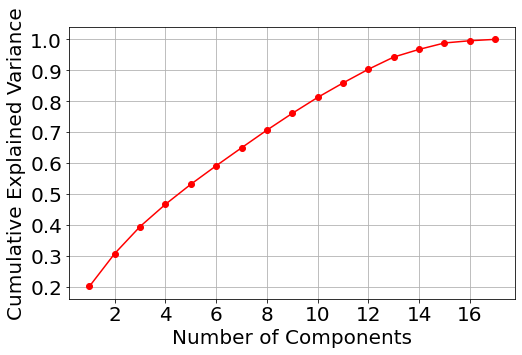

In [21]:
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Cumulative Explained Variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

Escolhendo as 8 variáveis com maior importância relativa, temos:

In [22]:
importances[0:8].sum(), attributes[0:8]

(0.7070600470522304,
 Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates'],
       dtype='object'))

Com isso, vemos que as variáveis 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration' , 'BounceRates' e 'ExitRates' são capazes de explicar, juntas, cerca de 70% da variação total, o que é um valor considerável. Além disso, o número de variáveis passa a ser bem menor do que o da base original, o que implica em um menor custo de processamento para as técnicas de aprendizado que serão utilizadas abaixo.

Podemos&nbsp;também&nbsp;analisar&nbsp;o&nbsp;nível&nbsp;de&nbsp;correlação&nbsp;nos&nbsp;dados:

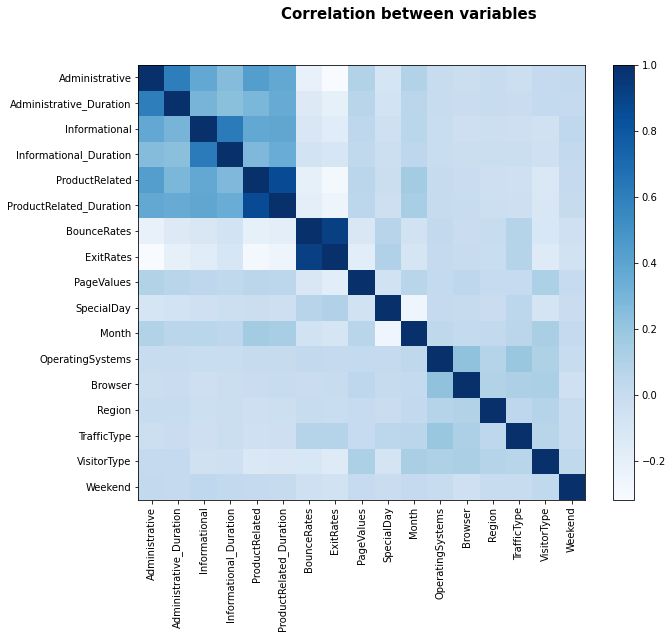

In [23]:
corr = df.loc[:, df.columns != 'Revenue'].corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Vemos que <b>'Administrative'-'Administrative_Duration'</b>, <b>'Informational'-'Informational_Duration'</b> e <b>'ProductRelated'-'ProductRelated_Duration'</b> estão fortemente correlacionados, o que faz sentido, pois as variáveis têm a mesma origem. Temos também uma alta correlação com <b>'BounceRate'-'ExitRates'</b>, o que pode ser atribuído ao fato de que os usuários que fazem parte do BounceRate saem de uma página, o que também leva ao aumento do ExitRates.

Vamos ver como estão distribuídas as classes de 'Revenue':

<AxesSubplot:>

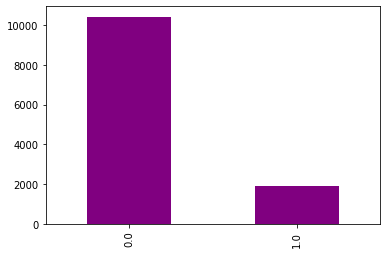

In [24]:
df['Revenue'].value_counts().plot(kind='bar', color='purple')

Com isso, vemos que há aproximadamente 5 vezes mais False do que True, o que indica que a maioria das sessões não resulta em uma venda. Além disso, implica que a base de dados está desbalanceada, pois há muito mais False do que True.

## Classificação

Agora, vamos utilizar a técnica KNN, com validação cruzada:

Melhor k: 1  AUC: 0.6862378035354756


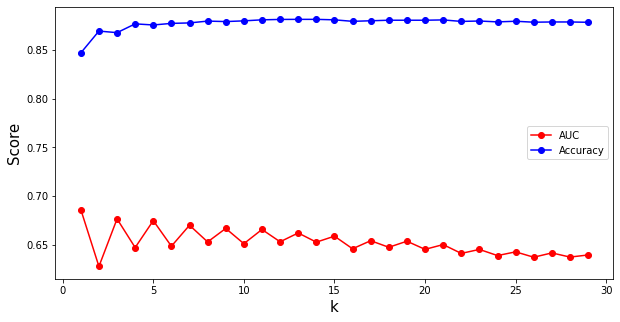

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vk = []
for k in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vk.append(k)
    #print('k:', k)
    #print('Average accuracy:', np.mean(vacc))
    #print('Average AUC:', np.mean(vauc))
best_k = np.argmax(mauc)+1
print('Melhor k:', best_k, ' AUC:',mauc[best_k-1])
plt.figure(figsize=(10,5))
plt.plot(vk, mauc, '-ro', label= 'AUC')
plt.plot(vk, macc, '-bo', label = 'Accuracy')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Vemos que, para a maioria dos k, a acurácia tem um valor alto. Isso pode ser atribuído ao fato de a base estar desbalanceada, o que induz ao modelo apresentar uma alta acurácia, mas que não representa a realidade. Temos também que, depois de k = 5, o valor da acurácia passou a se manter estável.

O melhor valor de AUC foi obtido com k = 1. A AUC pode ser considerada uma métrica mais confiável nesse caso, pois ela retrata melhor as bases desbalanceadas.

Usando o classificador SVM, precisamos escolher o melhor valor do parâmetro c.

Melhor c: 24  AUC: 0.7412491597942297


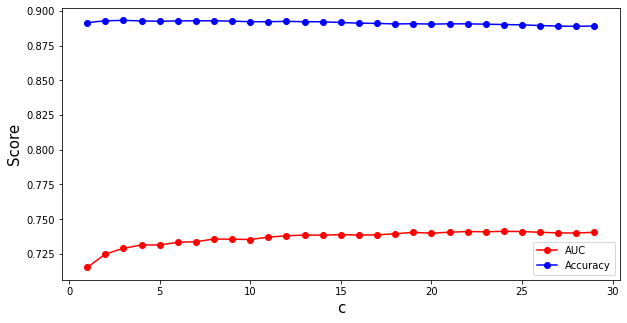

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vc = []
for c in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = SVC(C = c, gamma = 'auto')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vc.append(c)
    #print('k:', k)
    #print('Average accuracy:', np.mean(vacc))
    #print('Average AUC:', np.mean(vauc))
best_c = np.argmax(mauc)+1
print('Melhor c:', best_c, ' AUC:',mauc[best_c-1])
plt.figure(figsize=(10,5))
plt.plot(vc, mauc, '-ro', label= 'AUC')
plt.plot(vc, macc, '-bo', label = 'Accuracy')
plt.xlabel('c', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Vamos usar o random forest.

Melhor n: 19  AUC: 0.7736521831778591


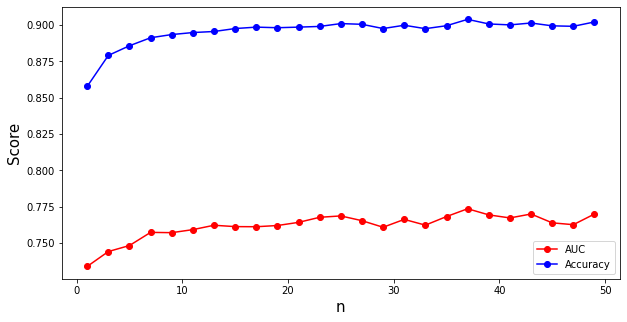

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(1, 50, 2):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

O classificador random forest permite ainda ordenar os atributos de acordo com a sua importância.

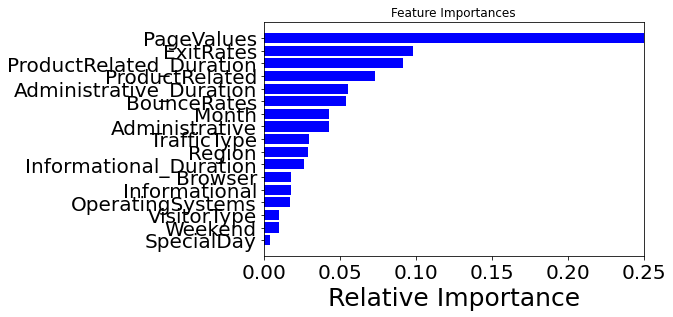

In [ ]:
importances = model.feature_importances_
attributes = df.columns[0:len(df.columns)-1]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()

Usando o classificador SGD, precisamos escolher o melhor valor do parâmetro loss.

Melhor loss: hinge  AUC: 0.6894566859403756


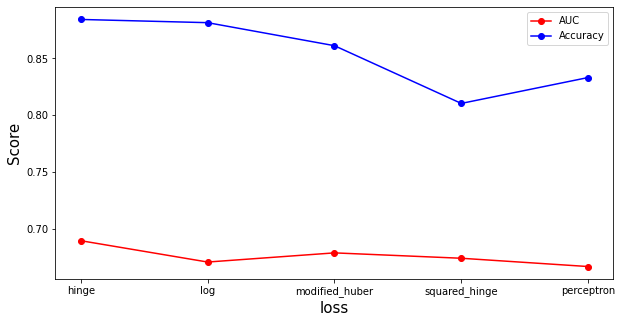

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauloss = []
macloss = []
vloss = []
losses = ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
for Loss in (losses):
    vauloss = []
    vacloss = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = SGDClassifier(loss = Loss, max_iter = 1000)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauloss.append(roc_auc_score(y_test, y_pred))
        vacloss.append(accuracy_score(y_pred, y_test))
    macloss.append(np.mean(vacloss))
    mauloss.append(np.mean(vauloss))
    vloss.append(Loss)
    #print('k:', k)
    #print('Average accuracy:', np.mean(vacc))
    #print('Average AUC:', np.mean(vauc))
best_loss = np.argmax(mauloss)
print('Melhor loss:', losses[best_loss], ' AUC:',mauloss[best_loss])
plt.figure(figsize=(10,5))
plt.plot(vloss, mauloss, '-ro', label= 'AUC')
plt.plot(vloss, macloss, '-bo', label = 'Accuracy')
plt.xlabel('loss', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

### Treinamento dos modelos

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Vamos treinar o melhor KNN obtido acima:

In [36]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Agora, para o SVM, temos:

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(C=24, gamma='auto', probability=True))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=24, gamma='auto', probability=True))])

Para o Random Forest, temos:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=19)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=19)

Para o SGD, temos:

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

sgd = SGDClassifier(loss='hinge')
sgd.fit(X_train, y_train)
calibrator = CalibratedClassifierCV(sgd, cv='prefit')
model=calibrator.fit(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((9247, 17), (11097,))

### Predição dos modelos

Temos a seguinte previsão pelo modelo KNN:

In [37]:
y_pred_knn = neigh.predict(X_test)
y_pred_knn

array([0., 1., 0., ..., 0., 0., 0.])

Temos a seguinte previsão pelo modelo SVM:

In [ ]:
y_pred_svm = clf.predict(X_test)
y_pred_svm

array([1., 0., 0., ..., 0., 0., 0.])

Temos a seguinte previsão pelo modelo Random Forest:

In [ ]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0., 0., 0., ..., 0., 0., 0.])

Temos&nbsp;a&nbsp;seguinte&nbsp;previsão&nbsp;pelo&nbsp;modelo&nbsp;SGD:

In [ ]:
y_pred_sgd = model.predict(X_test)
y_pred_sgd

array([0., 0., 0., ..., 0., 0., 0.])

### Avaliação dos modelos

Vamos utilizar como métrica de comparação de qualidade a AUC, pois a base é desbalanceada.

Para o KNN, temos a seguinte curva AUC:

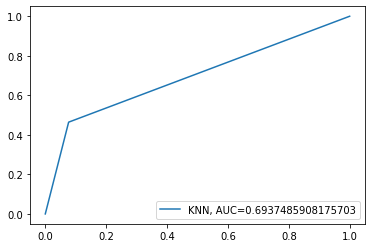

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba_knn = neigh.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc_knn))
plt.legend(loc=4)
plt.show()

Para&nbsp;o&nbsp;SVM,&nbsp;temos&nbsp;a&nbsp;seguinte&nbsp;curva&nbsp;AUC:

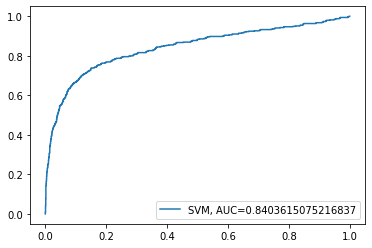

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba_clf = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_clf)
auc_clf = roc_auc_score(y_test, y_pred_proba_clf)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc_clf))
plt.legend(loc=4)
plt.show()

Para&nbsp;o&nbsp;Random Forest,&nbsp;temos&nbsp;a&nbsp;seguinte&nbsp;curva&nbsp;AUC:

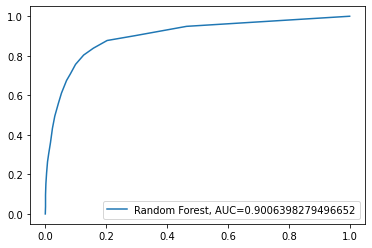

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba_rfc = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rfc)
auc_rfc = roc_auc_score(y_test, y_pred_proba_rfc)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc_rfc))
plt.legend(loc=4)
plt.show()

Para o SGD, temos a seguinte curva AUC:

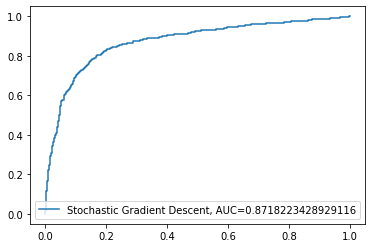

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba_sgd = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_sgd)
auc_sgd = roc_auc_score(y_test, y_pred_proba_sgd)
plt.plot(fpr,tpr,label="Stochastic Gradient Descent, AUC="+str(auc_sgd))
plt.legend(loc=4)
plt.show()

Após os resultados, a melhor AUC é do Random Forest.

### Interpretação dos resultados

Abaixo temos a matriz de confusão para o Random Forest, para verificarmos se os verdadeiros negativos e os verdadeiros positivos possuem bons resultados.

<AxesSubplot:>

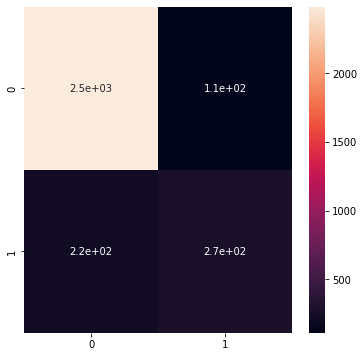

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rfc)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

Os verdadeiros negativos deram bons resultados, pois como visto abaixo existe uma quantidade muito maior de zeros na variável resposta. E os verdadeiros positivos também deram resultados condizentes, pois estão em menor proporção.

In [ ]:
df['Revenue'].value_counts()

0.0    10422
1.0     1908
Name: Revenue, dtype: int64

Devido a base não conter valores nulos, o tratamento de valores faltantes não foi feito, evitando mais um tipo de tratamento nos dados. Como a base já estava pronta para a modelagem, foi possível obter uma boa AUC.

Outra contribuição para obter um bom resultado final, foi o uso do StandardScaler, para normalizar a base e garantir que diferenças de escala não influenciem no treinamento dos modelos.

Vemos que a curva AUC do modelo treinado com o KNN é diferente das demais, pois possui uma curva menos suave que as demais. Além disso, ela apresenta a menor AUC dos modelos utilizados e o eixo Y da curva indica que tem mais quantidade de TP do que de FN. 

Seria possível utilizar outra métrica de desempenho caso a base fosse balanceada, como a acurácia. É possível aplicar métodos de balanceamento, mas optamos por não utilizar tais técnicas, pois podem afetar o desempenho dos modelos.